In [1]:
import pyodbc # connection to database

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db_path = r'C:\Users\GILBERT FG\Desktop\Readings\PSP_database.accdb'

conn = pyodbc.connect(
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    rf'DBQ={db_path};'
)

cursor = conn.cursor()

# list all tables in the database
for table in cursor.tables(tableType='TABLE'):
    print(table.table_name)

Block register
Plot monitoring history
Plot-block relation
PSPs
Slope correction factors
Thinning history
TreeData


In [3]:
# Query the database

tree_data_query = r"SELECT * FROM TreeData WHERE AreaType = 'Teak' AND Plantations  = 'Tain II'"

# Read to dataframe
df = pd.read_sql(tree_data_query, conn)

# preview the dataset
df.head()

C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_1472\4169209562.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(tree_data_query, conn)


,Plantations,AreaType,Monitoring year,Monitoring month,Monitoring day,PLOT,TREE NR,Tree SPECIES,Species scientific name,H (m),DBH (cm),Merchantable height (m),REMARKS,Incorrect DBH,Incorrect H,Incorrect H / DBH,Exclude,Justification for exclusion
0,Tain II,Teak,2018.0,1.0,13,1,71.0,Teak,Tectona grandis,7.25,12.0,None,Fire scars,False,False,None,False,None
1,Tain II,Teak,2018.0,1.0,13,1,76.0,Teak,Tectona grandis,8.25,12.0,None,Fire scars,False,False,None,False,None
2,Tain II,Teak,2018.0,1.0,13,1,68.0,Teak,Tectona grandis,7.00,11.8,None,Fire scars,False,False,None,False,None
3,Tain II,Teak,2018.0,1.0,13,1,53.0,Teak,Tectona grandis,7.25,11.5,None,Fire scars,False,False,None,False,None
4,Tain II,Teak,2018.0,1.0,13,1,58.0,Teak,Tectona grandis,7.00,10.5,None,Fire scars,False,False,None,False,None


In [5]:
df['REMARKS'].unique()

array(['Fire scars', 'Dead tree - fire scars', None, 'Beetle infestation',
       'Top broken', 'Dead tree', 'Top Broken', 'Climber on top',
       'Beetle', 'Bent', 'Dieback', 'climber', 'forked', 'bent', '',
       'marked', 'Marked, dead', 'Top Broken, Marked', 'under a tree',
       'Climber', 'tree dimensions not recorded. DBH >20cm', 'Forked',
       'tall', 'fork', 'short', 'Abnormal tree, correct measurement',
       'Under tree', 'crooked', ' ',
       'Indigenous tree in teak area. Dimensions not recorded',
       'Half dead', 'Under a tree', 'TOP BROKEN', 'Marked',
       'Abnormal tree', 'Crooked'], dtype=object)

## Data Cleaning

In [6]:
# Remove dead trees, beetle infestations, dieback, etc
df  = df[~((df['REMARKS'] == 'Dead tree - fire scars') | (df['REMARKS'] == 'Beetle infestation') | (df['REMARKS'] == 'Marked, dead') | (df['REMARKS'] == 'Dead tree'))]

In [7]:
df = df[~((df['REMARKS'] == 'tree dimensions not recorded. DBH >20cm') | (df['REMARKS'] == 'Abnormal tree, correct measurement') | (df['REMARKS'] == 'Indigenous tree in teak area. Dimensions not recorded'))]

In [8]:
df = df[~((df['REMARKS'] == 'Half dead') | (df['REMARKS'] == 'Abnormal tree'))]

In [9]:
df['REMARKS'].unique()

array(['Fire scars', None, 'Top broken', 'Top Broken', 'Climber on top',
       'Beetle', 'Bent', 'Dieback', 'climber', 'forked', 'bent', '',
       'marked', 'Top Broken, Marked', 'under a tree', 'Climber',
       'Forked', 'tall', 'fork', 'short', 'Under tree', 'crooked', ' ',
       'Under a tree', 'TOP BROKEN', 'Marked', 'Crooked'], dtype=object)

In [10]:
df = df[~((df['REMARKS'] == 'Dieback'))]

In [11]:
df['REMARKS'].unique()

array(['Fire scars', None, 'Top broken', 'Top Broken', 'Climber on top',
       'Beetle', 'Bent', 'climber', 'forked', 'bent', '', 'marked',
       'Top Broken, Marked', 'under a tree', 'Climber', 'Forked', 'tall',
       'fork', 'short', 'Under tree', 'crooked', ' ', 'Under a tree',
       'TOP BROKEN', 'Marked', 'Crooked'], dtype=object)

In [12]:
df['DBH (cm)'].unique()

array([12.  , 11.8 , 11.5 , 10.5 , 10.4 ,  9.9 ,  9.2 ,  8.1 ,  7.7 ,
        7.  ,  6.6 ,  6.2 ,  6.1 ,  6.  ,  5.8 ,  5.4 ,  5.1 ,  5.  ,
        4.9 ,  4.5 ,  4.3 ,  3.7 ,  3.6 ,  3.4 ,  3.  ,  2.9 ,  2.8 ,
        2.1 ,  2.  ,  1.8 ,  1.2 ,  0.  , 14.8 , 14.5 , 14.3 , 13.3 ,
       13.  , 12.3 , 11.7 , 11.4 , 11.2 ,  9.7 ,  8.9 ,  8.5 ,  8.4 ,
        7.8 ,  7.5 ,  7.3 ,  6.8 ,  6.7 ,  5.7 ,  5.3 ,  4.  ,  3.8 ,
        3.3 ,  2.7 ,  1.3 , 15.2 , 15.  , 14.6 , 14.4 , 14.2 , 14.1 ,
       14.  , 13.2 , 13.1 , 12.9 , 12.8 , 12.7 , 12.6 , 12.5 , 12.4 ,
       12.2 , 12.1 , 11.3 , 10.8 , 10.6 , 10.3 , 10.1 , 10.  ,  8.  ,
        7.4 , 18.2 , 18.  , 17.8 , 17.6 , 17.5 , 16.4 , 16.  , 15.9 ,
       15.7 , 15.5 , 15.1 , 13.9 , 13.6 , 13.5 , 13.4 , 11.  , 10.2 ,
        9.6 ,  6.4 , 11.9 , 10.7 ,  9.3 ,  7.6 ,  7.2 ,  4.2 , 16.7 ,
       14.7 ,  9.1 ,  8.8 ,  8.3 ,  8.2 , 11.1 , 10.9 ,  7.9 ,  5.5 ,
        5.2 ,  4.8 ,  4.1 , 20.  , 18.5 , 17.4 , 16.8 , 16.6 , 16.5 ,
       16.2 , 15.6 ,

In [13]:
df.dropna(subset=['DBH (cm)'], inplace=True)

In [14]:
df['H (m)'].unique()

array([ 7.25 ,  8.25 ,  7.   ,  6.25 ,  6.5  ,  6.   ,  4.5  ,  4.   ,
        5.25 ,  4.75 ,  5.   ,  5.75 ,  3.5  ,  3.25 ,  3.75 ,  3.   ,
        2.75 ,  2.5  ,  2.2  ,  1.75 ,  2.05 ,  1.45 ,  0.5  ,  0.48 ,
        0.9  ,  0.8  ,  9.5  ,  7.5  ,  8.   ,  8.5  ,  7.75 ,  6.75 ,
        8.75 ,  5.5  ,  4.25 ,  2.25 ,  9.25 , 10.   ,  9.   ,  9.75 ,
       10.25 , 11.   , 12.75 , 10.75 , 11.25 , 12.25 , 11.5  , 11.75 ,
       14.   , 13.5  , 10.5  , 12.   , 12.5  , 13.   ,  7.7  , 13.25 ,
       13.75 , 14.25 , 14.5  ,  8.7  , 11.1  ,  9.2  ,  2.3  ,  2.1  ,
        2.8  ,  2.   ,  1.65 ,  1.6  ,  1.5  ,  2.45 ,  5.7  ,  5.26 ,
        5.3  ,  3.45 ,  3.2  ,  6.7  ,  3.71 ,  2.26 ,  4.79 ,  1.8  ,
        2.53 ,  1.28 ,  8.72 ,  7.4  ,  2.13 , 15.25 , 15.5  , 15.   ,
        8.76 , 11.56 ,  2.06 , 14.75 ,  9.15 ,  8.8  ,  4.74 ,  2.9  ,
        1.93 ,  1.29 ,  5.35 ,  7.56 ,  6.9  ,  2.7  ,  8.4  ,  6.15 ,
        2.85 ,  2.84 ,  7.6  ,  3.21 ,  2.78 ,  1.4  ,  3.7  , 10.2  ,
      

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191296 entries, 0 to 191859
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Plantations                  191296 non-null  object 
 1   AreaType                     191296 non-null  object 
 2   Monitoring year              191296 non-null  float64
 3   Monitoring month             191296 non-null  float64
 4   Monitoring day               191296 non-null  int64  
 5   PLOT                         191296 non-null  object 
 6   TREE NR                      191296 non-null  float64
 7   Tree SPECIES                 191296 non-null  object 
 8   Species scientific name      191296 non-null  object 
 9   H (m)                        191296 non-null  float64
 10  DBH (cm)                     191296 non-null  float64
 11  Merchantable height (m)      0 non-null       object 
 12  REMARKS                      69697 non-null   object 
 13  Inco

### Data Transformation

#### Create Measuring date from monitoring day, month and year

In [16]:
# convert monitoring month and year types from float to int types
df['Monitoring year'] = df['Monitoring year'].astype(int)
df['Monitoring month'] = df['Monitoring month'].astype(int)
df['Monitoring day'] = df['Monitoring day'].astype(int)

In [17]:
# convert them to strings for easy converting datetime types
df['Monitoring year'] = df['Monitoring year'].astype(str)
df['Monitoring month'] = df['Monitoring month'].astype(str)
df['Monitoring day'] = df['Monitoring day'].astype(str)

In [18]:
# creating date string from the monitoring day, month and year
df['Measuring date'] = df['Monitoring day'] + '/' + df['Monitoring month'] + '/' + df['Monitoring year']

# converting date string to datetime types
df['Measuring date'] = pd.to_datetime(df['Measuring date'], dayfirst=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191296 entries, 0 to 191859
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Plantations                  191296 non-null  object        
 1   AreaType                     191296 non-null  object        
 2   Monitoring year              191296 non-null  object        
 3   Monitoring month             191296 non-null  object        
 4   Monitoring day               191296 non-null  object        
 5   PLOT                         191296 non-null  object        
 6   TREE NR                      191296 non-null  float64       
 7   Tree SPECIES                 191296 non-null  object        
 8   Species scientific name      191296 non-null  object        
 9   H (m)                        191296 non-null  float64       
 10  DBH (cm)                     191296 non-null  float64       
 11  Merchantable height (m)      0 

In [20]:
df['Exclude'].unique()

array([False,  True])

In [21]:
df = df[~((df['Exclude'] == True))]

In [22]:
df['Exclude'].unique()

array([False])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191146 entries, 0 to 191859
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Plantations                  191146 non-null  object        
 1   AreaType                     191146 non-null  object        
 2   Monitoring year              191146 non-null  object        
 3   Monitoring month             191146 non-null  object        
 4   Monitoring day               191146 non-null  object        
 5   PLOT                         191146 non-null  object        
 6   TREE NR                      191146 non-null  float64       
 7   Tree SPECIES                 191146 non-null  object        
 8   Species scientific name      191146 non-null  object        
 9   H (m)                        191146 non-null  float64       
 10  DBH (cm)                     191146 non-null  float64       
 11  Merchantable height (m)      0 

In [24]:
# compute height-DBH relationship or ratio
df['H/D'] = df['H (m)'] / df['DBH (cm)']

In [25]:
df = df[~((df['Justification for exclusion'] == 'Climber on top') | (df['Justification for exclusion'] == 'climber'))]
df = df[~((df['Justification for exclusion'] == 'Bent') | (df['Justification for exclusion'] == 'forked') | (df['Justification for exclusion'] == 'Beetle'))]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191014 entries, 0 to 191859
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Plantations                  191014 non-null  object        
 1   AreaType                     191014 non-null  object        
 2   Monitoring year              191014 non-null  object        
 3   Monitoring month             191014 non-null  object        
 4   Monitoring day               191014 non-null  object        
 5   PLOT                         191014 non-null  object        
 6   TREE NR                      191014 non-null  float64       
 7   Tree SPECIES                 191014 non-null  object        
 8   Species scientific name      191014 non-null  object        
 9   H (m)                        191014 non-null  float64       
 10  DBH (cm)                     191014 non-null  float64       
 11  Merchantable height (m)      0 

### BASIC STATISTICS

In [27]:
stat_data = df[['H (m)', 'DBH (cm)']]

In [28]:
stat_data.describe()

,H (m),DBH (cm)
count,191014.000000,191014.000000
mean,9.031307,10.824829
std,4.163845,5.618743
min,0.000000,0.000000
25%,5.750000,6.400000
50%,8.750000,10.200000
75%,12.500000,14.900000
max,22.350000,37.300000


#### MERGE PLOT TO BLOCK REGISTER

In [29]:
block_query = r"SELECT * FROM [Plot-block relation] WHERE Plantations = 'Tain II' AND AreaType = 'Teak'"

blk_df = pd.read_sql(block_query, conn)

blk_df.head()

C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_1472\3411902383.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  blk_df = pd.read_sql(block_query, conn)


,RelationID,Plantations,Plot no,AreaType,Deviating plant year,Block,Start date,End date
0,74,Tain II,1370,Teak,NaN,PF80,2020-05-01,9999-12-31 00:00:00
1,76,Tain II,1372,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00
2,77,Tain II,1366,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00
3,78,Tain II,1363,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00
4,79,Tain II,1374,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00


In [30]:
blk_df = blk_df.rename(columns={'Plot no': 'PLOT'})

In [31]:
blk_df.head()

,RelationID,Plantations,PLOT,AreaType,Deviating plant year,Block,Start date,End date
0,74,Tain II,1370,Teak,NaN,PF80,2020-05-01,9999-12-31 00:00:00
1,76,Tain II,1372,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00
2,77,Tain II,1366,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00
3,78,Tain II,1363,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00
4,79,Tain II,1374,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00


In [32]:
trimed_df = blk_df[['PLOT', 'Block']]

In [33]:
df = pd.merge(df, trimed_df, on='PLOT')

In [34]:
df.head()

,Plantations,AreaType,Monitoring year,Monitoring month,Monitoring day,PLOT,TREE NR,Tree SPECIES,Species scientific name,H (m),...,Merchantable height (m),REMARKS,Incorrect DBH,Incorrect H,Incorrect H / DBH,Exclude,Justification for exclusion,Measuring date,H/D,Block
0,Tain II,Teak,2018,1,13,1,71.0,Teak,Tectona grandis,7.25,...,None,Fire scars,False,False,None,False,None,2018-01-13,0.604167,B39
1,Tain II,Teak,2018,1,13,1,76.0,Teak,Tectona grandis,8.25,...,None,Fire scars,False,False,None,False,None,2018-01-13,0.687500,B39
2,Tain II,Teak,2018,1,13,1,68.0,Teak,Tectona grandis,7.00,...,None,Fire scars,False,False,None,False,None,2018-01-13,0.593220,B39
3,Tain II,Teak,2018,1,13,1,53.0,Teak,Tectona grandis,7.25,...,None,Fire scars,False,False,None,False,None,2018-01-13,0.630435,B39
4,Tain II,Teak,2018,1,13,1,58.0,Teak,Tectona grandis,7.00,...,None,Fire scars,False,False,None,False,None,2018-01-13,0.666667,B39


In [35]:
plot_hist_query = r"SELECT * FROM [Plot monitoring history] WHERE Plantations = 'Tain II' AND AreaType = 'Teak'"
plot_hist_df = pd.read_sql(plot_hist_query, conn)
plot_hist_df.head()

C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_1472\52232978.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  plot_hist_df = pd.read_sql(plot_hist_query, conn)


,MonitoringID,Plantations,Plot no,AreaType,Monitoring year,Monitoring Month,Monitoring day,Default plot size,Plot type,Monitoring team,Shrub cover (%),Herb cover (%),Invasive species cover (%),Erosion,Remarks,Excluded,Justification for exclusion,MDate
0,2154,Tain II,18,Teak,2018,1,22,729.0,Square,"Bentil, Ernest, Prince, Kwakye",NaN,NaN,None,False,None,False,None,2018-01-22
1,2155,Tain II,18,Teak,2019,1,24,729.0,Square,"Augustine,Enoch,Vida,Frank & Judith",NaN,NaN,None,False,None,False,None,2019-01-24
2,2156,Tain II,19,Teak,2018,2,13,729.0,Square,"Prince, Philp, Kwakye, Bentil, Danquah",NaN,NaN,None,False,None,False,None,2018-02-13
3,2157,Tain II,19,Teak,2019,1,23,729.0,Square,"Belinda,Kingsley,Prince,Stephen & Juliet",NaN,NaN,None,False,None,False,None,2019-01-23
4,2158,Tain II,20,Teak,2018,2,13,729.0,Square,"Prince, Philp, Kwakye, Bentil, Danquah",NaN,NaN,None,False,None,False,None,2018-02-13


In [36]:
trimed_plot_hist_df = plot_hist_df[['Plot no', 'Default plot size']]

In [37]:
trimed_plot_hist_df = trimed_plot_hist_df.rename(columns={'Plot no': 'PLOT'})
trimed_plot_hist_df.head()

,PLOT,Default plot size
0,18,729.0
1,18,729.0
2,19,729.0
3,19,729.0
4,20,729.0


In [38]:
df = pd.merge(df, trimed_plot_hist_df, on='PLOT')
df.head()

,Plantations,AreaType,Monitoring year,Monitoring month,Monitoring day,PLOT,TREE NR,Tree SPECIES,Species scientific name,H (m),...,REMARKS,Incorrect DBH,Incorrect H,Incorrect H / DBH,Exclude,Justification for exclusion,Measuring date,H/D,Block,Default plot size
0,Tain II,Teak,2018,1,13,1,71.0,Teak,Tectona grandis,7.25,...,Fire scars,False,False,None,False,None,2018-01-13,0.604167,B39,729.0
1,Tain II,Teak,2018,1,13,1,71.0,Teak,Tectona grandis,7.25,...,Fire scars,False,False,None,False,None,2018-01-13,0.604167,B39,729.0
2,Tain II,Teak,2018,1,13,1,71.0,Teak,Tectona grandis,7.25,...,Fire scars,False,False,None,False,None,2018-01-13,0.604167,B39,729.0
3,Tain II,Teak,2018,1,13,1,71.0,Teak,Tectona grandis,7.25,...,Fire scars,False,False,None,False,None,2018-01-13,0.604167,B39,729.0
4,Tain II,Teak,2018,1,13,1,71.0,Teak,Tectona grandis,7.25,...,Fire scars,False,False,None,False,None,2018-01-13,0.604167,B39,729.0


In [39]:
# trimmed the dataframe to relevant features
df = df[['Plantations', 'AreaType', 'Measuring date', 'PLOT', 'TREE NR', 'H (m)', 'DBH (cm)', 'Block', 'Default plot size']]
df.head()

,Plantations,AreaType,Measuring date,PLOT,TREE NR,H (m),DBH (cm),Block,Default plot size
0,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0
1,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0
2,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0
3,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0
4,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0


In [40]:
df.describe()

,Measuring date,TREE NR,H (m),DBH (cm),Default plot size
count,853226,853226.000000,853226.00000,853226.000000,853226.0
mean,2020-11-30 18:20:22.595654144,40.242286,9.48937,11.410174,729.0
min,2018-01-13 00:00:00,1.000000,0.00000,0.000000,729.0
25%,2019-02-15 00:00:00,20.000000,6.25000,7.000000,729.0
50%,2021-02-24 00:00:00,40.000000,9.35000,11.000000,729.0
75%,2023-01-11 00:00:00,60.000000,13.00000,15.500000,729.0
max,2024-03-14 00:00:00,81.000000,22.35000,37.300000,729.0
std,NaN,23.448373,4.11654,5.610228,0.0


In [41]:
# compute plot size in ha
df['Plot size (ha)'] = df['Default plot size'] / 10000

In [42]:
df.head()

,Plantations,AreaType,Measuring date,PLOT,TREE NR,H (m),DBH (cm),Block,Default plot size,Plot size (ha)
0,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0,0.0729
1,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0,0.0729
2,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0,0.0729
3,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0,0.0729
4,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0,0.0729


In [43]:
df['Measuring year'] = df['Measuring date'].dt.year

In [44]:
df.head()

,Plantations,AreaType,Measuring date,PLOT,TREE NR,H (m),DBH (cm),Block,Default plot size,Plot size (ha),Measuring year
0,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0,0.0729,2018
1,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0,0.0729,2018
2,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0,0.0729,2018
3,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0,0.0729,2018
4,Tain II,Teak,2018-01-13,1,71.0,7.25,12.0,B39,729.0,0.0729,2018


In [45]:
stems_per_ha_df = df[['Block', 'PLOT', 'TREE NR', 'H (m)', 'DBH (cm)', 'Plot size (ha)', 'Measuring year']]

In [46]:
stems_per_ha_df.head()

,Block,PLOT,TREE NR,H (m),DBH (cm),Plot size (ha),Measuring year
0,B39,1,71.0,7.25,12.0,0.0729,2018
1,B39,1,71.0,7.25,12.0,0.0729,2018
2,B39,1,71.0,7.25,12.0,0.0729,2018
3,B39,1,71.0,7.25,12.0,0.0729,2018
4,B39,1,71.0,7.25,12.0,0.0729,2018


#### Stems per hectare (SPHA) per Plot

In [47]:
# Count number of trees per block, plot, and year
stems_per_ha_df = stems_per_ha_df.groupby(['Block', 'PLOT', 'Measuring year', 'Plot size (ha)'])['TREE NR'].nunique().reset_index()
stems_per_ha_df = stems_per_ha_df.rename(columns={'TREE NR': 'Tree count'})

In [48]:
stems_per_ha_df['SPHA'] = stems_per_ha_df['Tree count'] / stems_per_ha_df['Plot size (ha)']
stems_per_ha_df['SPHA'] = stems_per_ha_df['SPHA'].astype(int)

In [49]:
stems_per_ha_df.head()

,Block,PLOT,Measuring year,Plot size (ha),Tree count,SPHA
0,A19,1141,2022,0.0729,63,864
1,A19,1141,2023,0.0729,63,864
2,A19,1142,2022,0.0729,42,576
3,A19,1142,2023,0.0729,43,589
4,A19,1143,2022,0.0729,32,438


### Average stems per hectare per block and year

In [51]:
avg_sph = stems_per_ha_df.groupby(['Block', 'Measuring year'])['SPHA'].mean().reset_index()

In [52]:
avg_sph

,Block,Measuring year,SPHA
0,A19,2022,633.300000
1,A19,2023,638.600000
2,A20,2022,740.300000
3,A20,2023,769.100000
4,A21,2022,695.625000
...,...,...,...
504,C7,2023,800.857143
505,C8,2024,648.400000
506,C9,2022,820.714286
507,C9,2023,797.285714


### SPHA plot

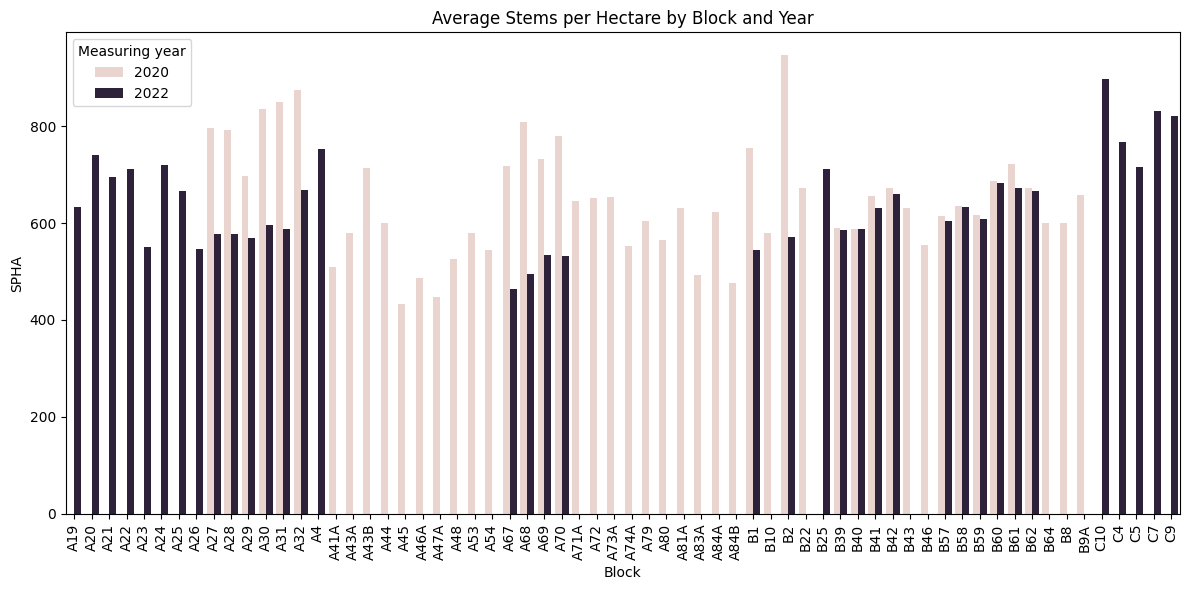

In [53]:
import seaborn as sns

filtered_df = avg_sph[avg_sph['Measuring year'].isin([2020, 2022])]

plt.figure(figsize=(12,6))
sns.barplot(data=filtered_df, x='Block', y='SPHA', hue='Measuring year')
plt.ylabel("SPHA")
plt.title('Average Stems per Hectare by Block and Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Compute Basal Area

In [54]:
basal_area_tree_df = df[['Block', 'PLOT', 'Plot size (ha)', 'TREE NR', 'H (m)', 'DBH (cm)', 'Measuring year']]

In [55]:
basal_area_tree_df.head()

,Block,PLOT,Plot size (ha),TREE NR,H (m),DBH (cm),Measuring year
0,B39,1,0.0729,71.0,7.25,12.0,2018
1,B39,1,0.0729,71.0,7.25,12.0,2018
2,B39,1,0.0729,71.0,7.25,12.0,2018
3,B39,1,0.0729,71.0,7.25,12.0,2018
4,B39,1,0.0729,71.0,7.25,12.0,2018


### Basal Area per Tree

In [56]:
basal_area_tree_df['basal_area_m2'] = (np.pi *  (basal_area_tree_df['DBH (cm)']**2))/ (4 * 10000)

C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_1472\574756609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basal_area_tree_df['basal_area_m2'] = (np.pi *  (basal_area_tree_df['DBH (cm)']**2))/ (4 * 10000)


In [57]:
basal_area_tree_df.head()

,Block,PLOT,Plot size (ha),TREE NR,H (m),DBH (cm),Measuring year,basal_area_m2
0,B39,1,0.0729,71.0,7.25,12.0,2018,0.01131
1,B39,1,0.0729,71.0,7.25,12.0,2018,0.01131
2,B39,1,0.0729,71.0,7.25,12.0,2018,0.01131
3,B39,1,0.0729,71.0,7.25,12.0,2018,0.01131
4,B39,1,0.0729,71.0,7.25,12.0,2018,0.01131


### Basal Area per Plot and Year

In [58]:
basal_area_plot = basal_area_tree_df.groupby(['Block', 'PLOT', 'Measuring year', 'basal_area_m2'])['TREE NR'].nunique().reset_index()

In [59]:
ba_plot_summary = basal_area_plot.groupby(['PLOT', 'Measuring year'])['basal_area_m2'].sum().reset_index()

In [60]:
ba_plot_summary.head()

,PLOT,Measuring year,basal_area_m2
0,1,2018,0.109859
1,1,2019,0.215210
2,1,2020,0.455585
3,1,2021,0.620590
4,1,2022,0.995644


### Basal Area per Hectare and Year

In [61]:
ba_per_ha = basal_area_tree_df.groupby(['Block', 'PLOT', 'Measuring year', 'Plot size (ha)'])['basal_area_m2'].sum().reset_index()

In [62]:
ba_per_ha['ba_per_ha'] = ba_per_ha['basal_area_m2'] / ba_per_ha['Plot size (ha)']

In [63]:
ba_per_ha.head()

,Block,PLOT,Measuring year,Plot size (ha),basal_area_m2,ba_per_ha
0,A19,1141,2022,0.0729,0.215028,2.949628
1,A19,1141,2023,0.0729,0.494035,6.776882
2,A19,1142,2022,0.0729,0.105580,1.448279
3,A19,1142,2023,0.0729,0.291618,4.000252
4,A19,1143,2022,0.0729,0.033547,0.460185


In [64]:
ba_by_plot = ba_per_ha[ba_per_ha['PLOT'] == '1']

In [65]:
ba_by_plot

,Block,PLOT,Measuring year,Plot size (ha),basal_area_m2,ba_per_ha
2726,B39,1,2018,0.0729,0.814258,11.169525
2727,B39,1,2019,0.0729,1.613244,22.129547
2728,B39,1,2020,0.0729,2.990700,41.024691
2729,B39,1,2021,0.0729,4.736488,64.972402
2730,B39,1,2022,0.0729,6.433688,88.253608
2731,B39,1,2023,0.0729,7.030917,96.446054


C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_1472\3585937926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ba_by_plot, x='Measuring year', y='ba_per_ha', palette='Blues_d')


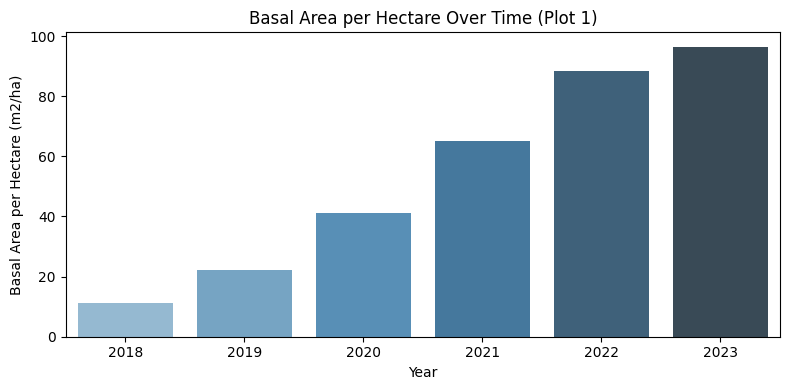

In [66]:
plt.figure(figsize=(8, 4))
sns.barplot(data=ba_by_plot, x='Measuring year', y='ba_per_ha', palette='Blues_d')
plt.title('Basal Area per Hectare Over Time (Plot 1)')
plt.ylabel("Basal Area per Hectare (m2/ha)")
plt.xlabel('Year')
plt.tight_layout()
plt.show()

### COMPUTING FOR DOMINANT HEIGHT

In [110]:
dom_df =  df[['Block', 'PLOT', 'TREE NR', 'H (m)', 'DBH (cm)', 'Plot size (ha)', 'Measuring year']]

### Dominant per plot

In [113]:
PLOT_SIZE_HA = 0.0729
TREES_PER_HA = 100
DOMINANT_COUNT = int(PLOT_SIZE_HA * TREES_PER_HA)

# Hart Dominant Height
def hart_dominant_height(group):
    top_trees = group.sort_values(by='DBH (cm)', ascending=False)
    return top_trees['H (m)'].mean()

dominant_height = dom_df.groupby(['Block', 'PLOT', 'Measuring year']).apply(hart_dominant_height).reset_index(name="Hdom")

C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_13612\2889743279.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dominant_height = dom_df.groupby(['Block', 'PLOT', 'Measuring year']).apply(hart_dominant_height).reset_index(name="Hdom")


In [119]:
dominant_height

,Block,PLOT,Measuring year,Hdom
0,A19,1141,2022,4.226190
1,A19,1141,2023,5.452381
2,A19,1142,2022,3.708333
3,A19,1142,2023,5.180233
4,A19,1143,2022,2.250000
...,...,...,...,...
4061,C9,1269,2022,3.552885
4062,C9,1269,2023,6.472826
4063,C9,1270,2022,5.044444
4064,C9,1270,2023,7.239583


In [133]:
# Dominant Height per block and year
dom_height = dominant_height.groupby(['Block','Measuring year'])['Hdom'].mean().reset_index()
dom_height

,Block,Measuring year,Hdom
0,A19,2022,3.627574
1,A19,2023,5.060612
2,A20,2022,4.697645
3,A20,2023,7.051218
4,A21,2022,3.332833
...,...,...,...
504,C7,2023,6.511534
505,C8,2024,4.506718
506,C9,2022,3.979788
507,C9,2023,6.312497
